# PCA project
>In this project, you will classify particles into gamma(signal) or hadrons(background). Given that the features are correlated, you will perform PCA to get a new set of features, and select the features that contain the most information. The data set was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998).

In [89]:
# import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## EDA

In [13]:
# load in datasets
data_matrix = pd.read_csv('data_matrix.csv',index_col=0)
classes = pd.read_csv('classes.csv',index_col=0)
telescope_data = pd.read_csv('telescope_data.csv',index_col=0)

In [14]:
data_matrix.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [15]:
classes.head()

,class
0,g
1,g
2,g
3,g
4,g


In [16]:
telescope_data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [17]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 0 to 19019
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [19]:
data_matrix.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [20]:
classes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 0 to 19019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   19020 non-null  object
dtypes: object(1)
memory usage: 297.2+ KB


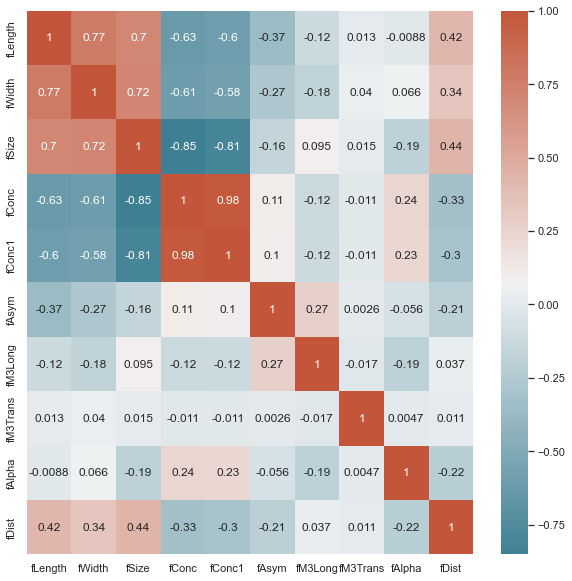

In [36]:
figure = plt.figure(figsize=(10,10))
ax1 = sns.heatmap(data_matrix.corr(),annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))

- many of the features are correlated, so use PCA to trial dimensionality reduction

## Perform PCA

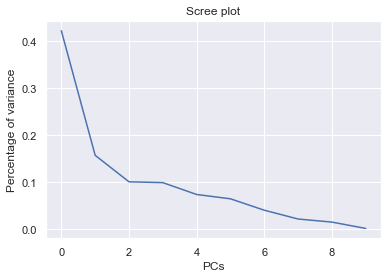

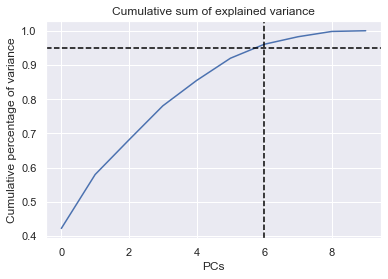

In [64]:
pca = PCA() # expects standardised data
scaler = StandardScaler()
data_matrix_standardised = scaler.fit_transform(data_matrix)

pca.fit(data_matrix_standardised)
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumsum = data=explained_variance_ratio.cumsum()

plt.figure(1)
ax_scree = sns.lineplot(data=explained_variance_ratio)
ax_scree.set_xlabel('PCs')
ax_scree.set_ylabel('Percentage of variance')
ax_scree.set_title('Scree plot')


plt.figure(2)
ax_cumsum = sns.lineplot(data=explained_variance_cumsum)
ax_cumsum.set_xlabel('PCs')
ax_cumsum.set_ylabel('Cumulative percentage of variance')
ax_cumsum.set_title('Cumulative sum of explained variance')
ax_cumsum.axhline(0.95,color='black',ls='--')
ax_cumsum.axvline(6,color='black',ls='--')

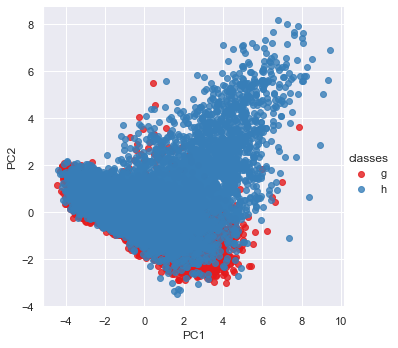

In [83]:
pcs = pca.transform(data_matrix_standardised)
pcs_2 = pcs[:,0:2]
data_reduced = pd.DataFrame(data=pcs_2,columns=['PC1','PC2'])
data_reduced['classes'] = classes

sns.lmplot(x='PC1',y='PC2',data=data_reduced,hue='classes',fit_reg=False,palette="Set1")

## Compare SVC with and without PCA

In [95]:
pipeline_woPCA = Pipeline([('scaler',StandardScaler()),
                           ('classifier',SVC(random_state=0))])
pipeline_wPCA = Pipeline([('scaler',StandardScaler()),
                          ('dimensionality reduction',PCA(n_components=6)),
                          ('classifier',SVC(random_state=0))])


X = data_matrix
y = classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

pipeline_woPCA.fit(X_train,y_train)
pipeline_wPCA.fit(X_train,y_train)

score_woPCA = pipeline_woPCA.score(X_test,y_test)
score_wPCA =  pipeline_wPCA.score(X_test,y_test)


print(f'Score with 6 PCs is {score_wPCA}')
print(f'Score wo dimensionality reduction is {score_woPCA}')

/Users/rad/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/rad/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score with 6 PCs is 0.8212521905368807
Score wo dimensionality reduction is 0.8674526047474909


We can see that we get similar accuracy with just 60% of the data!